In [73]:
import keras as k
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

import numpy as np

from matplotlib import pyplot as plt

In [13]:
from keras.datasets import mnist

In [62]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [66]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [67]:
model = k.models.Sequential([
    k.layers.Flatten(input_shape = (28, 28, 1), name = 'Input'),
    k.layers.Dense(128, activation = 'relu', name = 'Hidden_1'),
    k.layers.Dropout(0.3),
    k.layers.Dense(256, activation = 'softplus', name = 'Hidden_2'),
    k.layers.Dense(10, activation = 'softmax', name = 'Output')
])

model.compile(
    loss= k.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer= Adam(learning_rate=0.0002),
    metrics=['accuracy']
)

In [68]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (Flatten)                 │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_1 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,074 (531.54 KB)

 Trainable params: 136,074 (531.54 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.fit(
    x_train,
    y_train,
    epochs=80,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1,
    callbacks=[
        k.callbacks.EarlyStopping(
            monitor="val_accuracy", patience=3, restore_best_weights=True
        ),
        k.callbacks.EarlyStopping(
            monitor="val_loss", patience=3, restore_best_weights=True
        ),
    ],
)

Epoch 1/80
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6880 - loss: 1.0931 - val_accuracy: 0.9237 - val_loss: 0.2677
Epoch 2/80
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9131 - loss: 0.2951 - val_accuracy: 0.9423 - val_loss: 0.1941
Epoch 3/80
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9323 - loss: 0.2330 - val_accuracy: 0.9509 - val_loss: 0.1621
Epoch 4/80
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9437 - loss: 0.1909 - val_accuracy: 0.9595 - val_loss: 0.1351
Epoch 5/80
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9504 - loss: 0.1685 - val_accuracy: 0.9633 - val_loss: 0.1222
Epoch 6/80
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9572 - loss: 0.1464 - val_accuracy: 0.9682 - val_loss: 0.1082
Epoch 7/80
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9586 - loss: 0.1370 - val_accuracy: 0.9683 - val_loss: 0.1010
Epoch 8/80
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9627 - loss: 0.1233 - val_accuracy: 0.

In [71]:
model.save('model/model_use_mist.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


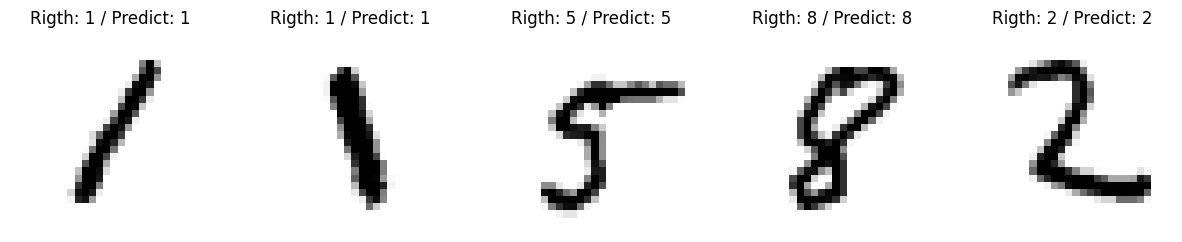

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


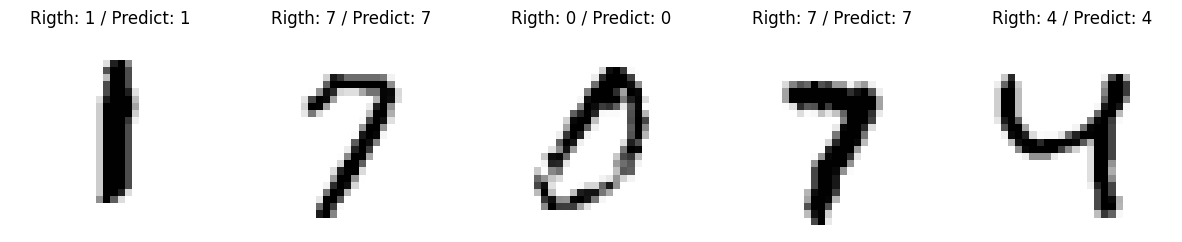

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


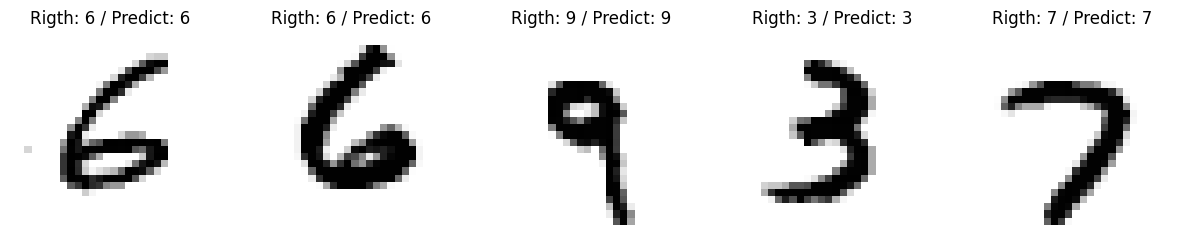

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


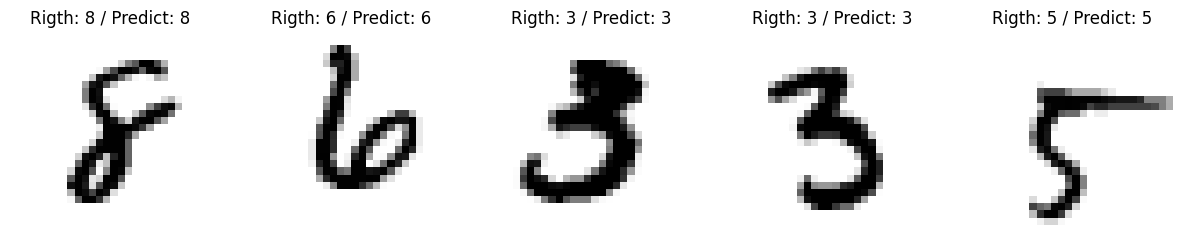

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


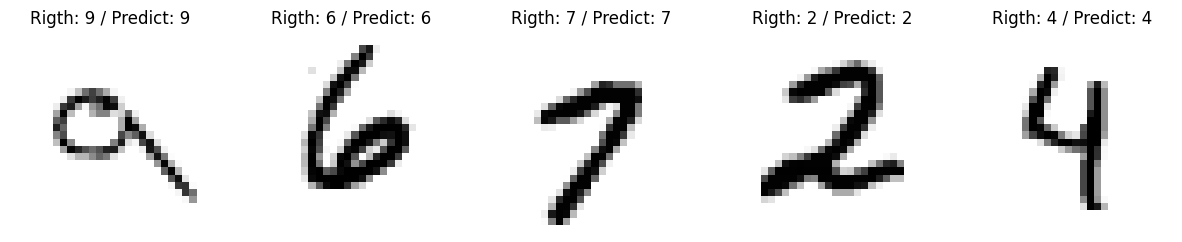

In [76]:
#test
count_random = 5
for _ in range(5): # повторимо 5 разів
    random_in_test = np.random.randint(0, len(x_test), count_random)
    x_random = x_test[random_in_test]
    y_random = y_test[random_in_test]

    random_predict = model.predict(x_random)

    img_size = 28

    fig = plt.figure(figsize=(15,6))
    for idx, i in enumerate(np.argmax(random_predict, axis=1)):
        value_correct = y_random[idx] == i
        plt.subplot(1, count_random, idx + 1)
        plt.imshow(x_random[idx].reshape(img_size, img_size), cmap = 'gray_r' if value_correct else 'Reds')
        plt.title(f'Rigth: {y_random[idx]} / Predict: {i}', color = 'black' if value_correct else 'r' )
        plt.axis("off")
    plt.show()